# Indian Retail Prices Analysis 2001 to 2021

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('Final_data.csv')

In [45]:
df_main = df
df

,Unnamed: 0,Unnamed: 0.1,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price
0,0,0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.00000
1,1,1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.00000
2,2,2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.50000
3,3,3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.32000
4,4,4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.32000
...,...,...,...,...,...,...,...,...,...,...
1134445,1147441,1147441,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198
1134446,1147442,1147442,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.30198
1134447,1147443,1147443,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198
1134448,1147444,1147444,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.00000


In [46]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
State           0
Centre          0
Commodity       0
Variety         0
Unit            0
Category        0
Date            0
Retail Price    0
dtype: int64

In [47]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"],axis=1)

In [48]:
#4. Which date has highest price of wheat?

column = (df["Commodity"]=="Wheat")
max_index = column.idxmax()

print(max_index, "Date")

#whats the price?


1012802 Date


In [49]:
df["Commodity"]

0          Moong
1          Moong
2          Moong
3          Moong
4          Moong
           ...  
1134445    Wheat
1134446    Wheat
1134447    Wheat
1134448    Wheat
1134449    Wheat
Name: Commodity, Length: 1134450, dtype: object

In [50]:
#5. Which is the highest price of wheat statewise?
#Answer Type 1

df[df["Commodity"]=="Wheat"].groupby(['State'])['Retail Price'].max().reset_index()



,State,Retail Price
0,Andhra Pradesh,44.000000
1,Arunachal Pradesh,47.000000
2,Assam,38.000000
3,Bihar,30.000000
4,Goa,36.000000
5,Gujarat,36.000000
6,Haryana,29.684211
7,Himachal Pradesh,29.684211
8,Jammu Kashmir,29.684211
9,Jharkhand,32.000000


In [51]:
#Answer Type 2

st = df["State"].unique()
for i in st:
    m_price = df[(df["State"]==i) & (df["Commodity"]=="Wheat")]["Retail Price"].max()
    print("State: %s Max Price: %0.2f"%(i,m_price))

State: Andhra Pradesh Max Price: 44.00
State: Arunachal Pradesh Max Price: 47.00
State: Assam Max Price: 38.00
State: Bihar Max Price: 30.00
State: Goa Max Price: 36.00
State: Gujarat Max Price: 36.00
State: Haryana Max Price: 29.68
State: Himachal Pradesh Max Price: 29.68
State: Jammu Kashmir Max Price: 29.68
State: Jharkhand Max Price: 32.00
State: Karnataka Max Price: 70.00
State: Kerala Max Price: 44.00
State: Madhya Pradesh Max Price: 32.00
State: Maharashtra Max Price: 40.00
State: Manipur Max Price: 29.68
State: Meghalaya Max Price: 29.68
State: Mizoram Max Price: nan
State: Nagaland Max Price: 29.68
State: National Capital Max Price: 29.68
State: Orissa Max Price: 36.00
State: Punjab Max Price: 29.68
State: Rajasthan Max Price: 30.00
State: Sikkim Max Price: 30.00
State: Tamil Nadu Max Price: 130.00
State: Telangana Max Price: 45.00
State: Tripura Max Price: 32.00
State: Union Territories Max Price: 29.68
State: Uttar Pradesh Max Price: 29.68
State: Uttarakhand Max Price: 29.68

It can be seen that Tamil Nadu has the highest price of wheat at 130 followed by Karnataka at 70

In [52]:
#6. If the commodity is mustard oil, how many varieties are available in mustard oil?

df[df["Commodity"]=="Mustard Oil"]["Variety"].value_counts()


FAQ    20655
Name: Variety, dtype: int64

In [53]:
#7. What is the pomphret max price in Kerala from 2001 to 2021?

# step 1: Split Date
df[['Month','Year']] = df.Date.str.split("-",expand=True,)
df


,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.00000,JAN,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.00000,JAN,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.50000,JAN,2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.32000,JAN,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.32000,JAN,2001
...,...,...,...,...,...,...,...,...,...,...
1134445,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198,MAR,2021
1134446,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.30198,MAR,2021
1134447,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198,MAR,2021
1134448,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.00000,MAR,2021


In [33]:
#7. What is the fish of variety pomphret max price in Kerala from 2001 to 2021?

df[(df["State"]=="Kerala") & (df["Commodity"]=="Pomphret")]["Retail Price"].max()



nan

In [34]:

st = df["Year"].unique()
for i in st:
    m_price = df[(df["Year"]==i) & (df["Commodity"]=="Fish") & (df["Variety"]=="Pomphret") & (df["State"]=="Kerala")]["Retail Price"].max()
    print("Year: %s Max Price: %0.2f"%(i,m_price))

Year: 2001 Max Price: 59.68
Year: 2002 Max Price: 70.00
Year: 2003 Max Price: 120.00
Year: 2004 Max Price: 130.00
Year: 2005 Max Price: 175.00
Year: 2006 Max Price: 180.00
Year: 2007 Max Price: 250.00
Year: 2008 Max Price: 300.00
Year: 2009 Max Price: 300.00
Year: 2010 Max Price: 400.00
Year: 2011 Max Price: 400.00
Year: 2012 Max Price: 450.00
Year: 2013 Max Price: 400.00
Year: 2014 Max Price: 232.88
Year: 2015 Max Price: 600.00
Year: 2016 Max Price: 680.00
Year: 2017 Max Price: 600.00
Year: 2018 Max Price: 650.00
Year: 2019 Max Price: 780.00
Year: 2020 Max Price: 750.00
Year: 2021 Max Price: 680.00


In [ ]:
The highest price of Pomphret in the state Kerala in each year is shown and it can be seen that the highest of it all is in the year 2019 at 780

In [35]:
#8. Which states are not using meat as commodity?


st = df["State"].unique()
for i in st:
    m_use = df[(df["State"]==i) & (df["Commodity"]!="Meat")].count()
    print(i,m_use)



Andhra Pradesh Unnamed: 0      53547
Unnamed: 0.1    53547
State           53547
Centre          53547
Commodity       53547
Variety         53547
Unit            53547
Category        53547
Date            53547
Retail Price    53547
Month           53547
Year            53547
dtype: int64
Arunachal Pradesh Unnamed: 0      12840
Unnamed: 0.1    12840
State           12840
Centre          12840
Commodity       12840
Variety         12840
Unit            12840
Category        12840
Date            12840
Retail Price    12840
Month           12840
Year            12840
dtype: int64
Assam Unnamed: 0      51846
Unnamed: 0.1    51846
State           51846
Centre          51846
Commodity       51846
Variety         51846
Unit            51846
Category        51846
Date            51846
Retail Price    51846
Month           51846
Year            51846
dtype: int64
Bihar Unnamed: 0      50388
Unnamed: 0.1    50388
State           50388
Centre          50388
Commodity       50388
Variety       

In [36]:
#9. How many types of variety of meat?

df[df["Commodity"]=="Meat"]["Variety"].value_counts()


Mutton    20412
Name: Variety, dtype: int64

In [37]:
df["Variety"].unique()

array(['Split', 'FAQ', 'Powdered Agmark', 'Common/Coarse', 'Fine',
       'Superfine', 'Loose(common)', 'Packet(iodized)',
       'Brooke Bond Red Label', 'Ctc(loose)', 'Glucose',
       'Delicious medium size', 'Local', 'White', 'Mutton', 'Cow/Buffalo',
       'Dairy', 'Common', 'Cat Fish', 'Pomphret', 'Rohu 1Kg Size', 'Desi',
       'Whole', 'Amul/Any Other', 'Poultry', 'Dry', 'Fresh', 'Instant',
       'Powdered', 'Kalyan HYV'], dtype=object)

In [38]:
#10. Which district has the highest price of rice in Maharastra?
for c in st:
    df["State"]="Maharashtra"
    
ct = df["Centre"].unique()
for i in ct:
    h_price = df[(df["Centre"]==i) & (df["State"]=="Maharashtra") & (df["Commodity"]=="Rice")]["Retail Price"].max()
    print("District: %s Max Price: %0.2f"%(i,h_price))


District: Chittoor Max Price: 54.00
District: Guntur Max Price: 52.00
District: Kurnool Max Price: 52.00
District: Vishakhapatnam Max Price: 54.00
District: Itanagar Max Price: 55.00
District: Dibrugarh Max Price: 60.00
District: Dispur Max Price: 62.00
District: Guwahati Max Price: 225.00
District: Silchar Max Price: 60.00
District: Gaya Max Price: 70.00
District: Hajipur Max Price: 125.00
District: Muzaffarpur Max Price: 51.12
District: Patna Max Price: 74.00
District: Panaji Max Price: 140.00
District: Gandhi Nagar Max Price: 110.00
District: Rajkot Max Price: 120.00
District: Surat Max Price: 80.00
District: Vadodra Max Price: 95.00
District: Hissar Max Price: 110.00
District: Karnal Max Price: 90.00
District: Mandi Max Price: 120.00
District: Shimla Max Price: 51.12
District: Jammu Max Price: 140.00
District: Shrinagar Max Price: 64.00
District: Dhanbad Max Price: 52.00
District: Ranchi Max Price: 64.00
District: Bangalore Max Price: 78.00
District: Bijapur Max Price: 65.00
Distri

In [39]:
df["Centre"].unique()

array(['Chittoor', 'Guntur', 'Kurnool', 'Vishakhapatnam', 'Itanagar',
       'Dibrugarh', 'Dispur', 'Guwahati', 'Silchar', 'Gaya', 'Hajipur',
       'Muzaffarpur', 'Patna', 'Panaji', 'Gandhi Nagar', 'Rajkot',
       'Surat', 'Vadodra', 'Hissar', 'Karnal', 'Mandi', 'Shimla', 'Jammu',
       'Shrinagar', 'Dhanbad', 'Ranchi', 'Bangalore', 'Bijapur', 'Hubli',
       'Tumkur', 'Ernakulam', 'Khozhikode', 'Trivandrum', 'Bhillai',
       'Bhopal', 'Gwalior', 'Indore', 'Rewa', 'Sehore', 'Aurangabad',
       'Mumbai', 'Nagpur', 'Nasik', 'Pune', 'Imphal', 'Shillong',
       'Aizwal', 'Kohima', 'Delhi', 'Bhawanipatna', 'Bhubneshwar',
       'Cuttack', 'Amritsar', 'Bhatinda', 'Ludhiana', 'Dausa', 'Jaipur',
       'Jodhpur', 'Swaimadhopur', 'Udaipur', 'Gangtok', 'Chennai',
       'Coimbatore', 'Madurai', 'Salem', 'Tambram', 'Tirunelveli',
       'Hyderabad', 'Agartala', 'Chandigarh', 'Pondicherry', 'Portblair',
       'Silvasa', 'Agra', 'Allahabad', 'Gorakhpur', 'Kanpur', 'Lucknow',
       'Saharanp

In [54]:
#11. What is the price difference between desi wheat and Kalyan HYV statewise?

st = df["State"].unique()
for i in st:
    m_price1 = df[(df["State"]==i) & (df["Commodity"]=="Wheat") & (df["Variety"]=="Desi")]["Retail Price"].mean()
    m_price2 = df[(df["State"]==i) & (df["Commodity"]=="Wheat") & (df["Variety"]=="Kalyan HYV")]["Retail Price"].mean()
    pdiff = m_price1 - m_price2
    print("State: %s Price Diff: %0.2f"%(i,pdiff))
    

State: Andhra Pradesh Price Diff: -1.06
State: Arunachal Pradesh Price Diff: -0.16
State: Assam Price Diff: -0.98
State: Bihar Price Diff: 0.54
State: Goa Price Diff: 1.44
State: Gujarat Price Diff: 0.02
State: Haryana Price Diff: 3.05
State: Himachal Pradesh Price Diff: -0.18
State: Jammu Kashmir Price Diff: 1.57
State: Jharkhand Price Diff: 0.63
State: Karnataka Price Diff: -0.56
State: Kerala Price Diff: 2.02
State: Madhya Pradesh Price Diff: 0.77
State: Maharashtra Price Diff: 0.81
State: Manipur Price Diff: nan
State: Meghalaya Price Diff: nan
State: Mizoram Price Diff: nan
State: Nagaland Price Diff: 0.26
State: National Capital Price Diff: 2.56
State: Orissa Price Diff: 2.39
State: Punjab Price Diff: 2.04
State: Rajasthan Price Diff: 1.74
State: Sikkim Price Diff: -0.08
State: Tamil Nadu Price Diff: -1.14
State: Telangana Price Diff: -1.20
State: Tripura Price Diff: 0.04
State: Union Territories Price Diff: -0.78
State: Uttar Pradesh Price Diff: 0.46
State: Uttarakhand Price Dif

In [20]:
st = df["State"].unique()
st

array(['Maharashtra'], dtype=object)

In [64]:
#12. How many variety of coffee is available and what is their price differences?

df[df["Commodity"]=="Coffee"]["Variety"].value_counts()

yr = df["Year"].unique()
for i in yr:
    m_price1 = df[(df["Commodity"]=="Coffee") & (df["Year"]==i) & (df["Variety"]=="Instant")]["Retail Price"].mean()
    m_price2 = df[(df["Commodity"]=="Coffee") & (df["Year"]==i) & (df["Variety"]=="Powdered")]["Retail Price"].mean()
    pdiff = m_price1 - m_price2
    print("Year: %s Price Diff: %0.2f"%(i, pdiff))


Year: 2001 Price Diff: -0.00
Year: 2002 Price Diff: 0.76
Year: 2003 Price Diff: 0.00
Year: 2004 Price Diff: 0.89
Year: 2005 Price Diff: 15.86
Year: 2006 Price Diff: -3.49
Year: 2007 Price Diff: 3.69
Year: 2008 Price Diff: -14.46
Year: 2009 Price Diff: -28.13
Year: 2010 Price Diff: -7.97
Year: 2011 Price Diff: 10.89
Year: 2012 Price Diff: 1.65
Year: 2013 Price Diff: 6.74
Year: 2014 Price Diff: 13.23
Year: 2015 Price Diff: 35.66
Year: 2016 Price Diff: 17.15
Year: 2017 Price Diff: 13.57
Year: 2018 Price Diff: -15.66
Year: 2019 Price Diff: -80.79
Year: 2020 Price Diff: -106.30
Year: 2021 Price Diff: -417.96


In [62]:
df[(df["Commodity"]=="Coffee") & (df["Year"]=="2001") & (df["Variety"]=="Instant")]


,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price,Month,Year
812660,Andhra Pradesh,Chittoor,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000,JAN,2001
812662,Andhra Pradesh,Guntur,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000,JAN,2001
812664,Andhra Pradesh,Kurnool,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000,JAN,2001
812666,Andhra Pradesh,Vishakhapatnam,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000,JAN,2001
812668,Arunachal Pradesh,Itanagar,Coffee,Instant,500gm. Pkt,Food,JAN-2001,137.375000,JAN,2001
...,...,...,...,...,...,...,...,...,...,...
821879,West Bengal,Asansol,Coffee,Instant,500gm. Pkt,Food,DEC-2001,137.545455,DEC,2001
821881,West Bengal,Howrah,Coffee,Instant,500gm. Pkt,Food,DEC-2001,137.545455,DEC,2001
821883,West Bengal,Jalpaiguri,Coffee,Instant,500gm. Pkt,Food,DEC-2001,137.545455,DEC,2001
821885,West Bengal,Kolkata,Coffee,Instant,500gm. Pkt,Food,DEC-2001,137.545455,DEC,2001


In [56]:
df

,State,Centre,Commodity,Variety,Unit,Category,Date,Retail Price,Month,Year
0,Andhra Pradesh,Chittoor,Moong,Split,Kg.,Food,JAN-2001,24.00000,JAN,2001
1,Andhra Pradesh,Guntur,Moong,Split,Kg.,Food,JAN-2001,26.00000,JAN,2001
2,Andhra Pradesh,Kurnool,Moong,Split,Kg.,Food,JAN-2001,25.50000,JAN,2001
3,Andhra Pradesh,Vishakhapatnam,Moong,Split,Kg.,Food,JAN-2001,28.32000,JAN,2001
4,Arunachal Pradesh,Itanagar,Moong,Split,Kg.,Food,JAN-2001,28.32000,JAN,2001
...,...,...,...,...,...,...,...,...,...,...
1134445,West Bengal,Jalpaiguri,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198,MAR,2021
1134446,West Bengal,Kolkata,Wheat,Desi,Kg.,Food,MAR-2021,29.30198,MAR,2021
1134447,West Bengal,Kolkata,Wheat,Kalyan HYV,Kg.,Food,MAR-2021,29.30198,MAR,2021
1134448,West Bengal,Malda,Wheat,Desi,Kg.,Food,MAR-2021,20.00000,MAR,2021


In [27]:
df[df["Commodity"]=="Coffee"]["Variety"].value_counts()

Instant     19683
Powdered    17739
Name: Variety, dtype: int64

In [71]:
#13. What are the varieties of fish available in the market from 2001 to 2010?


df[df["Commodity"]=="Fish"]["Variety"].value_counts()
yr1 = [ str(i) for i in range(2001,2011)]
for i in yr1:
    fv = df[(df["Commodity"]=="Fish") & (df["Year"]==i)]["Variety"].value_counts()
    print(i,fv)


2001 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2002 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2003 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2004 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2005 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2006 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2007 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2008 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2009 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64
2010 Rohu 1Kg Size    996
Pomphret         840
Cat Fish         696
Name: Variety, dtype: int64


In [70]:

[ i for i in range(2001,2011)]

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

In [69]:
yr1

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'], dtype=object)

In [65]:
#14. Which state has lowest price of Bajra according to yearwise?

st = df["State"].unique()
for i in st:
    m_price = df[(df["State"]==i) & (df["Commodity"]=="Bajra")]["Retail Price"].min()
    print("State: %s Min Price: %0.2f"%(i,m_price))


State: Andhra Pradesh Min Price: 5.00
State: Arunachal Pradesh Min Price: nan
State: Assam Min Price: 6.26
State: Bihar Min Price: 6.00
State: Goa Min Price: 6.53
State: Gujarat Min Price: 5.50
State: Haryana Min Price: 5.00
State: Himachal Pradesh Min Price: 6.26
State: Jammu Kashmir Min Price: 6.26
State: Jharkhand Min Price: 6.26
State: Karnataka Min Price: 5.50
State: Kerala Min Price: 6.26
State: Madhya Pradesh Min Price: 4.00
State: Maharashtra Min Price: 6.00
State: Manipur Min Price: 6.26
State: Meghalaya Min Price: 6.26
State: Mizoram Min Price: nan
State: Nagaland Min Price: 6.26
State: National Capital Min Price: 6.00
State: Orissa Min Price: 6.00
State: Punjab Min Price: 5.00
State: Rajasthan Min Price: 4.00
State: Sikkim Min Price: 6.26
State: Tamil Nadu Min Price: 5.75
State: Telangana Min Price: 6.26
State: Tripura Min Price: nan
State: Union Territories Min Price: 6.00
State: Uttar Pradesh Min Price: 3.50
State: Uttarakhand Min Price: 6.26
State: West Bengal Min Price: 

In [76]:
#15. How many types of oils are available and their varieties?

# step 1: Split Oil
new = df["Commodity"].str.split(" ", n = 1, expand = True)
df["Type"]= new[1]
#df["Commodity"]= new[0]
df.Type.value_counts()

Oil         80190
Chillies    20412
Pepper      20412
Seed        20169
Name: Type, dtype: int64

In [81]:
df1 = df[df["Type"]=="Oil"]
cu = df1.Commodity.unique()
for i in cu:
    p = df[df["Commodity"]==i].Variety.value_counts()
    print(i, p)

Mustard Oil FAQ    20655
Name: Variety, dtype: int64
Groundnut Oil FAQ    20169
Name: Variety, dtype: int64
Gingelly Oil FAQ    19440
Name: Variety, dtype: int64
Coconut Oil FAQ    19926
Name: Variety, dtype: int64


In [72]:
df["Commodity"].unique()

array(['Moong', 'Mustard Oil', 'Onion', 'Potato', 'Ragi', 'Red Chillies',
       'Rice', 'Salt', 'Sugar', 'Suji', 'Tea', 'Arhar', 'Atta', 'Bajra',
       'Banana', 'Besan', 'Biscuit', 'Apple', 'Groundnut Oil', 'Gur',
       'Jowar', 'Maida', 'Maize', 'Masur', 'Meat', 'Milk', 'Coriander',
       'Cummin Seed', 'Eggs', 'Fish', 'Ghee', 'Gingelly Oil', 'Gram',
       'Black Pepper', 'Bread', 'Brinjal', 'Butter', 'Chicken', 'Coconut',
       'Coconut Oil', 'Coffee', 'Tomato', 'Turmeric', 'Urad', 'Vanaspati',
       'Wheat'], dtype=object)

In [70]:
df["Oils"].unique()

array(['Moong', 'Mustard', 'Onion', 'Potato', 'Ragi', 'Red', 'Rice',
       'Salt', 'Sugar', 'Suji', 'Tea', 'Arhar', 'Atta', 'Bajra', 'Banana',
       'Besan', 'Biscuit', 'Apple', 'Groundnut', 'Gur', 'Jowar', 'Maida',
       'Maize', 'Masur', 'Meat', 'Milk', 'Coriander', 'Cummin', 'Eggs',
       'Fish', 'Ghee', 'Gingelly', 'Gram', 'Black', 'Bread', 'Brinjal',
       'Butter', 'Chicken', 'Coconut', 'Coffee', 'Tomato', 'Turmeric',
       'Urad', 'Vanaspati', 'Wheat'], dtype=object)

In [84]:
df_new = df.rename(columns={'Oils': 'Commodity'})
print(df_new)

                     State          Centre Commodity     Variety Unit  \
0           Andhra Pradesh        Chittoor     Moong       Split  Kg.   
1           Andhra Pradesh          Guntur     Moong       Split  Kg.   
2           Andhra Pradesh         Kurnool     Moong       Split  Kg.   
3           Andhra Pradesh  Vishakhapatnam     Moong       Split  Kg.   
4        Arunachal Pradesh        Itanagar     Moong       Split  Kg.   
...                    ...             ...       ...         ...  ...   
1134445        West Bengal      Jalpaiguri     Wheat  Kalyan HYV  Kg.   
1134446        West Bengal         Kolkata     Wheat        Desi  Kg.   
1134447        West Bengal         Kolkata     Wheat  Kalyan HYV  Kg.   
1134448        West Bengal           Malda     Wheat        Desi  Kg.   
1134449        West Bengal           Malda     Wheat  Kalyan HYV  Kg.   

        Category      Date  Retail Price Month  Year  Type  
0           Food  JAN-2001      24.00000   JAN  2001  None  
1

In [85]:
#16. Which state consume more local products commodity wise?[in variety field]

df2 =df[(df["Variety"]=="Local") | (df["Variety"]=="Desi")]
df2.Commodity.unique()

array(['Gur', 'Ghee', 'Bread', 'Wheat'], dtype=object)

In [87]:
df2.groupby(["State", "Commodity"])["Unit"].count().max()

1458

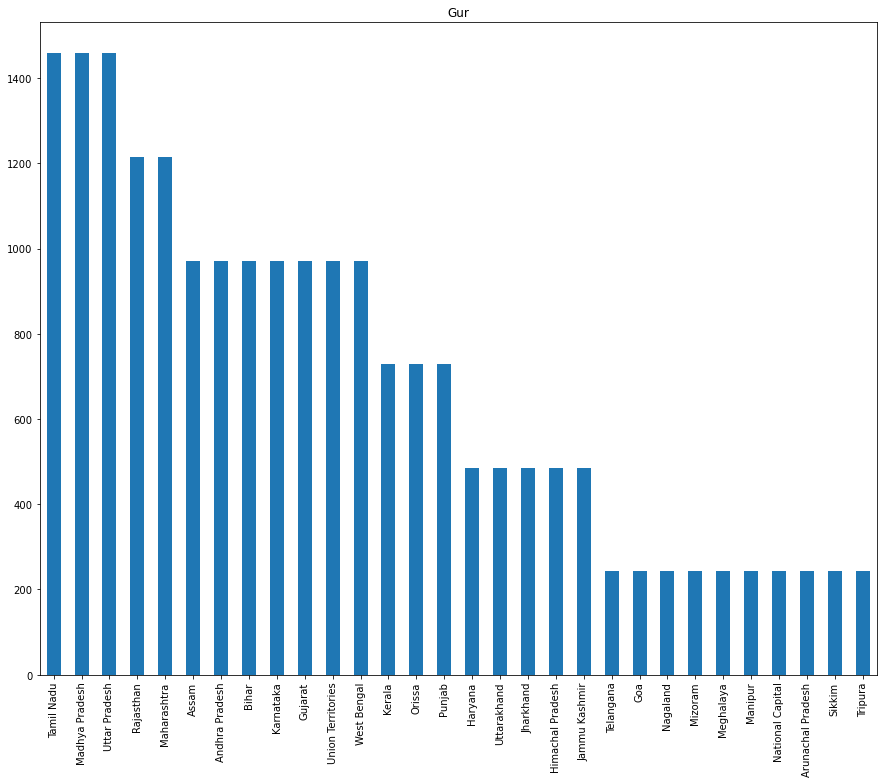

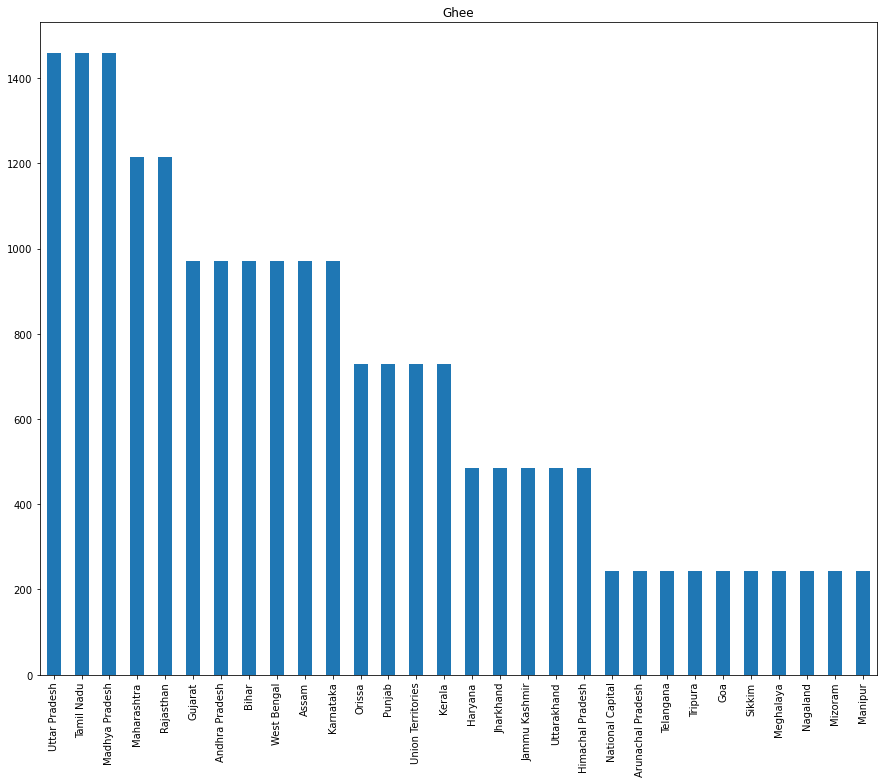

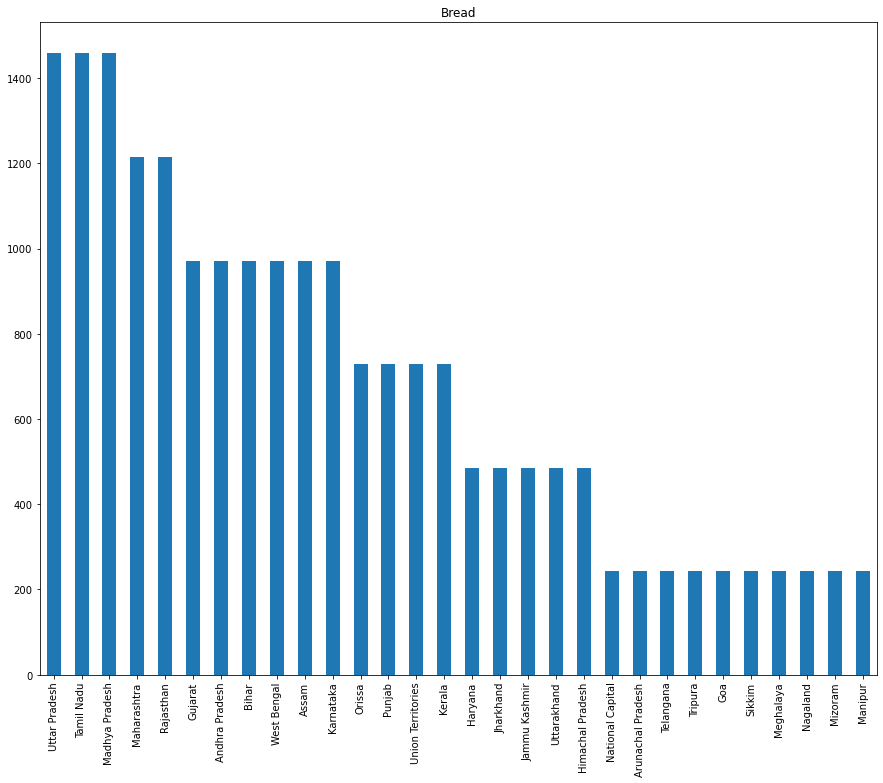

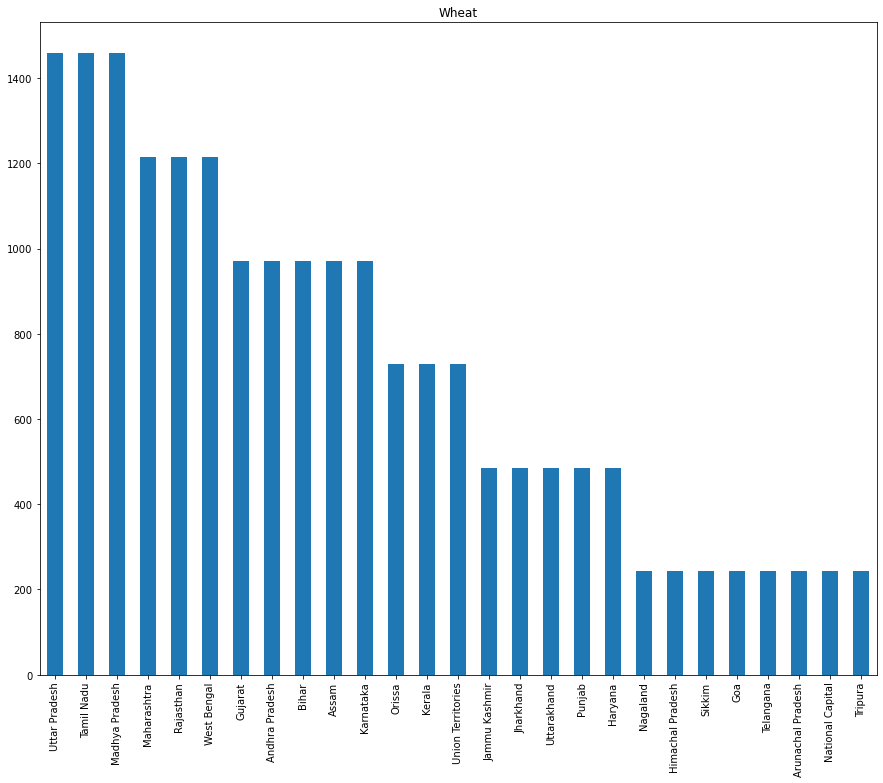

In [93]:
h = df2.Commodity.unique()
for i in h:
    plt.figure(figsize=(15,12))
    df2[df2["Commodity"]==i].State.value_counts().plot(kind="bar")
    plt.title(i)
    plt.show()

The commodity Gur, Ghee, Bread & Wheat has the highest in the State Tamil Nadu, Madhya Pradesh & Uttar Pradesh. 

# Conclusion

In conclusion, based on the various types of analysis, it can be understood that there has been definite inflation. However, the last few years has been similar more or less. 